<h1><center>Module 15: Lesson 6 Data Exploration 2 assignment</center></h1>

## Assignment

In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'studentsperformance'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

_________________________________________________________________________________________________________________

##### Import packages

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

pd.set_option('display.max_columns', 500)

##### Grab data

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

studentsperformance_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
studentsperformance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
studentsperformance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


_________________________________________________________________________________________________________________

##### Question 1

* Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [8]:
count_table = pd.crosstab(studentsperformance_df["gender"], studentsperformance_df["race/ethnicity"])

In [9]:
count_table

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


In [17]:
studentsperformance_df.groupby("gender").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


> males have a higher math score on average, and females higher reading and writing scores.

In [18]:
studentsperformance_df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


> group E has the highest score on average across all scores.

In [19]:
studentsperformance_df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


>The more schooling a parent has the higher the average score across all areas.

##### Question 2

* Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [20]:
studentsperformance_df.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [23]:
ttest_ind(studentsperformance_df[studentsperformance_df.lunch == "free/reduced"][["math score", "reading score", "writing score"]],
          studentsperformance_df[studentsperformance_df.lunch == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

> The students who receive a 'free/reduced' lunch perform worse than the students who are receiving the standard lunch. I would explain this the students who are receiving a 'free/reduced' lunch are lower income students and have other explanatory variables which influence their scores.

> We also see that the ttest yields a pvalue significantly below the 0.05 threshold, we therefore can state that the results are statistically significant and we can be certain the difference in scores is in fact actual and not just due to noise.

##### Question 3

* Does the test preparation course seem to have an effect on the exam performances?

In [24]:
studentsperformance_df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [25]:
ttest_ind(studentsperformance_df[studentsperformance_df['test preparation course'] == "completed"][["math score", "reading score", "writing score"]],
          studentsperformance_df[studentsperformance_df['test preparation course'] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

> The students who complete the test preparation course have higher scores than students who do not complete the course. We also have pvalues which are below the 0.05 threshold, we therefore can state that the results are statistically significant and we can be certain the difference in scores is in fact actual and not just due to noise.

##### Question 4

* Which 2 exam scores are most correlated with each other?

In [41]:
%matplotlib inline

In [45]:
corrmat_student

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


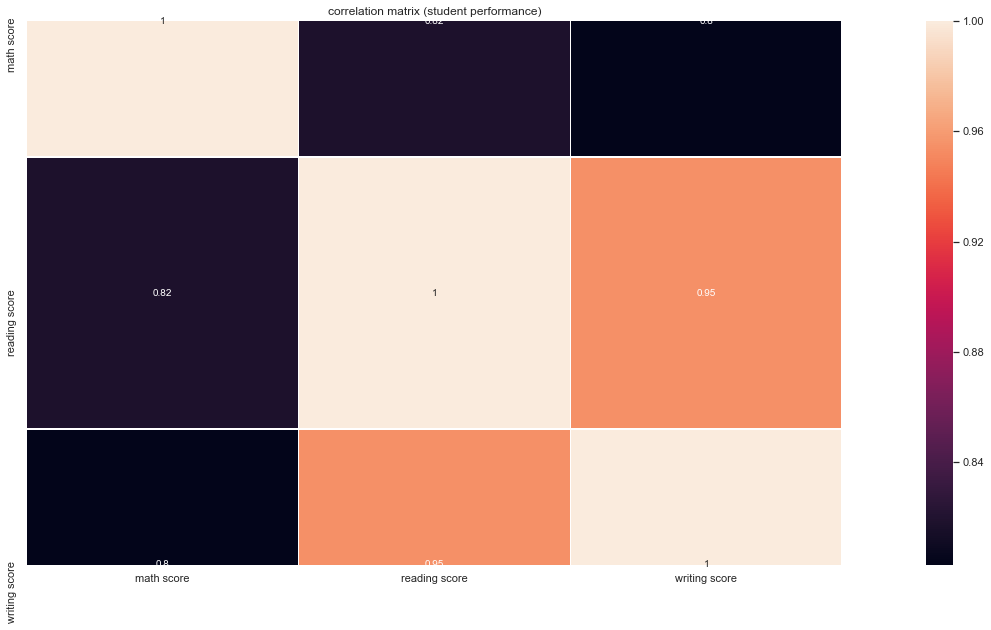

In [44]:
# make the correlation matrices.
corrmat_student = studentsperformance_df.corr()

# heatmaps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(30,10))

# draw the heatmap using seaborn.
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")

plt.show()

> Reading and Writing are the most highly correlated variables.

In [39]:
! pip install matplotlib